<a href="https://colab.research.google.com/github/YUM1yum/2025DL_Term_Project/blob/main/DL_1%EC%A1%B0_9%EB%8B%A8%EA%B3%84_%EC%88%9C%EC%B0%A8%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00


## 가상 데이터 생성, 성능 테스트를 위한 데이터 업로드

In [ ]:
!mkdir train_dataset

In [ ]:
# 배경
!unzip train_dataset/stage1.zip -d ./train_dataset/
!unzip train_dataset/stage2.zip -d ./train_dataset/
!unzip train_dataset/stage3.zip -d ./train_dataset/
!unzip train_dataset/stage4.zip -d ./train_dataset/
!unzip train_dataset/stage3_label.zip -d ./train_dataset/stage3_label
!unzip train_dataset/stage4_label.zip -d ./train_dataset/stage4_label

# 아이콘
!unzip train_dataset/icon_3.zip -d ./train_dataset/icons/

# 아덜즈
!unzip train_dataset/others.zip -d ./train_dataset/others/

Archive:  train_dataset/stage1.zip
  inflating: ./train_dataset/stage1/a1.png  
  inflating: ./train_dataset/stage1/a11133.png  
  inflating: ./train_dataset/stage1/a2342.png  
  inflating: ./train_dataset/stage1/a311.jpg  
  inflating: ./train_dataset/stage1/a41.png  
  inflating: ./train_dataset/stage1/a4212.png  
  inflating: ./train_dataset/stage1/a45.png  
  inflating: ./train_dataset/stage1/a5.png  
  inflating: ./train_dataset/stage1/a6543.png  
  inflating: ./train_dataset/stage1/a7777777777777.png  
  inflating: ./train_dataset/stage1/a88.png  
  inflating: ./train_dataset/stage1/a942.png  
Archive:  train_dataset/stage2.zip
  inflating: ./train_dataset/stage2/b1111115.png  
  inflating: ./train_dataset/stage2/b1234.png  
  inflating: ./train_dataset/stage2/b12413.png  
  inflating: ./train_dataset/stage2/b2.png  
  inflating: ./train_dataset/stage2/b2134.png  
  inflating: ./train_dataset/stage2/b2323.png  
  inflating: ./train_dataset/stage2/b3155.png  
  inflating: ./train_

In [ ]:
import zipfile
import os

zip_path = "/content/test_data_all.zip"
extract_path = "/content/test_dataset/test_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ 압축 해제 완료")

✅ 압축 해제 완료


## 1~9단계 가상 데이터 생성
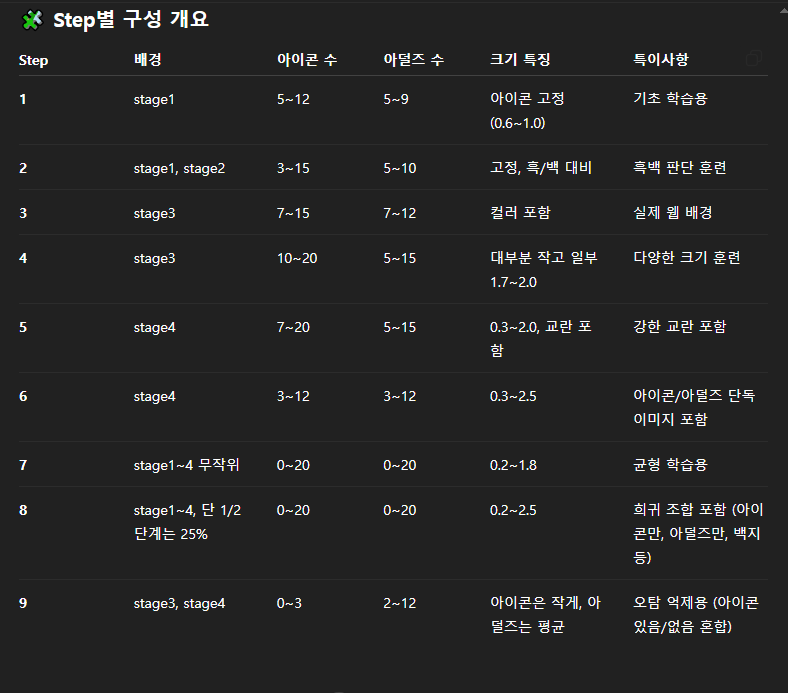

#### 1단계

In [ ]:
##### 1단계

import os
import random
from PIL import Image
import numpy as np
from pathlib import Path

# 🧮 생성할 이미지 개수
num_images = 200

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_dir = root / "stage1"
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step1"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

# 유틸 함수
def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

# 데이터 로딩
bg_list = list(bg_dir.glob("*.*"))
icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and others, "❌ 필요한 데이터 없음"

# 데이터 생성
for idx in range(num_images):
    bg = Image.open(random.choice(bg_list)).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 아덜즈 먼저 (크기 스케일↑)
    for _ in range(random.randint(5, 9)):
        obj = Image.open(random.choice(others)).convert("RGBA")
        scale = random.uniform(1.0, 1.8)  # 🎯 키움
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘
    for _ in range(random.randint(5, 12)):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        candidates = icons_black if bright else icons_white
        if not candidates: continue
        obj = Image.open(random.choice(candidates)).convert("RGBA")
        scale = random.uniform(0.2, 0.6)
        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x = random.randint(0, img_w - w)
        y = random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 2단계

In [ ]:
##### 2

import os
import random
from PIL import Image
import numpy as np
from pathlib import Path

# 🧮 생성할 이미지 개수
num_images = 300

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_dirs = [root / "stage1", root / "stage2"]
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step2"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

bg_list = sum([list(p.glob("*.*")) for p in bg_dirs], [])
icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and others, "❌ 필요한 데이터 없음"

for idx in range(num_images):
    bg = Image.open(random.choice(bg_list)).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 아덜즈 (크기 키움)
    for _ in range(random.randint(5, 10)):
        obj = Image.open(random.choice(others)).convert("RGBA")
        scale = random.uniform(1.0, 1.8)
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘 (크기 줄임)
    for _ in range(random.randint(3, 15)):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        candidates = icons_black if bright else icons_white
        if not candidates: continue
        obj = Image.open(random.choice(candidates)).convert("RGBA")
        scale = random.uniform(0.3, 0.6)
        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x = random.randint(0, img_w - w)
        y = random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 3단계

In [ ]:
##### 3

import os
import random
from PIL import Image
import numpy as np
from pathlib import Path

# 🧮 생성할 이미지 개수
num_images = 400

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_dirs = [root / "stage3", root / "stage4"]
label_dirs = [root / "stage3_label", root / "stage4_label"]
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step3"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

bg_list = []
bg_to_label = {}

for bg_dir, lbl_dir in zip(bg_dirs, label_dirs):
    for bg_path in bg_dir.glob("*.*"):
        bg_list.append(bg_path)
        label_path = lbl_dir / (bg_path.stem + ".txt")
        if label_path.exists():
            with open(label_path, "r") as f:
                bg_to_label[bg_path.name] = f.read().strip()
        else:
            bg_to_label[bg_path.name] = ""

icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and icons_color and others, "❌ 필요한 데이터 없음"

for idx in range(num_images):
    bg_path = random.choice(bg_list)
    bg = Image.open(bg_path).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 배경 라벨 붙이기
    existing_labels = bg_to_label.get(bg_path.name, "")
    if existing_labels:
        label_lines.extend(existing_labels.splitlines())

    # 아덜즈 (7~12)
    for _ in range(random.randint(7, 12)):
        obj = Image.open(random.choice(others)).convert("RGBA")
        scale = random.uniform(1.0, 1.8)
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘 (7~15), 흑백+컬러 포함
    for _ in range(random.randint(7, 15)):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        use_color = random.random() < 0.3
        if use_color:
            candidates = icons_color
        else:
            candidates = icons_black if bright else icons_white
        if not candidates: continue
        obj = Image.open(random.choice(candidates)).convert("RGBA")
        scale = random.uniform(0.3, 0.8)
        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x = random.randint(0, img_w - w)
        y = random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 4단계

In [ ]:
##### 4

import os
import random
from PIL import Image, ImageFilter
import numpy as np
from pathlib import Path

# 🧮 생성할 이미지 개수
num_images = 500

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_dirs = [root / "stage3"]
label_dirs = [root / "stage3_label"]
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step4"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

# 배경 이미지와 해당 라벨 불러오기
bg_list = []
bg_to_label = {}
for bg_dir, lbl_dir in zip(bg_dirs, label_dirs):
    for bg_path in bg_dir.glob("*.*"):
        bg_list.append(bg_path)
        label_path = lbl_dir / (bg_path.stem + ".txt")
        if label_path.exists():
            with open(label_path, "r") as f:
                bg_to_label[bg_path.name] = f.read().strip()
        else:
            bg_to_label[bg_path.name] = ""

# 객체 이미지 불러오기
icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and icons_color and others, "❌ 필요한 데이터 없음"

for idx in range(num_images):
    bg_path = random.choice(bg_list)
    bg = Image.open(bg_path).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 기존 배경 라벨 붙이기
    existing_labels = bg_to_label.get(bg_path.name, "")
    if existing_labels:
        label_lines.extend(existing_labels.splitlines())

    # 아덜즈 (5~15개)
    for _ in range(random.randint(5, 15)):
        obj = Image.open(random.choice(others)).convert("RGBA")
        scale = random.uniform(1.0, 1.8)
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘 (10~20개), 컬러 포함, 전체 작게
    for _ in range(random.randint(12, 25)):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        use_color = random.random() < 0.3
        candidates = icons_color if use_color else (icons_black if bright else icons_white)
        if not candidates: continue
        obj = Image.open(random.choice(candidates)).convert("RGBA")
        scale = random.uniform(0.3, 1.0)
        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x = random.randint(0, img_w - w)
        y = random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 💥 노이즈 추가
    arr = np.array(bg)
    noise = np.random.normal(0, 8, arr.shape).astype(np.int16)
    noisy_arr = np.clip(arr.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    bg = Image.fromarray(noisy_arr)

    # 저장
    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 5단계

In [ ]:
#####5

import os
import random
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
from pathlib import Path

# 🧮 생성할 이미지 개수
num_images = 500

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_dirs = [root / "stage4"]
label_dirs = [root / "stage4_label"]
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step5"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

# 배경 이미지와 라벨 불러오기
bg_list = []
bg_to_label = {}
for bg_dir, lbl_dir in zip(bg_dirs, label_dirs):
    for bg_path in bg_dir.glob("*.*"):
        bg_list.append(bg_path)
        label_path = lbl_dir / (bg_path.stem + ".txt")
        if label_path.exists():
            with open(label_path, "r") as f:
                bg_to_label[bg_path.name] = f.read().strip()
        else:
            bg_to_label[bg_path.name] = ""

# 객체 이미지 불러오기
icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and icons_color and others, "❌ 필요한 데이터 없음"

for idx in range(num_images):
    bg_path = random.choice(bg_list)
    bg = Image.open(bg_path).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 기존 배경 라벨 붙이기
    existing_labels = bg_to_label.get(bg_path.name, "")
    if existing_labels:
        label_lines.extend(existing_labels.splitlines())

    # 아덜즈 (5~15개)
    for _ in range(random.randint(5, 15)):
        obj = Image.open(random.choice(others)).convert("RGBA")
        scale = random.uniform(1.0, 1.8)
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘 (7~20개), 흑백+컬러
    for _ in range(random.randint(7, 24)):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        use_color = random.random() < 0.3
        candidates = icons_color if use_color else (icons_black if bright else icons_white)
        if not candidates: continue
        obj = Image.open(random.choice(candidates)).convert("RGBA")
        scale = random.uniform(0.3, 0.8)
        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        # 💥 경계 흐림
        if random.random() < 0.3:
            obj = obj.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 1.5)))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x = random.randint(0, img_w - w)
        y = random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 💥 밝기 대비, 색상 교란, 노이즈
    enhancer = ImageEnhance.Contrast(bg)
    bg = enhancer.enhance(random.uniform(0.9, 1.3))  # 대비 조정
    enhancer = ImageEnhance.Color(bg)
    bg = enhancer.enhance(random.uniform(0.8, 1.4))  # 색조 조정

    arr = np.array(bg)
    noise = np.random.normal(0, 6, arr.shape).astype(np.int16)
    noisy_arr = np.clip(arr.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    bg = Image.fromarray(noisy_arr)

    # 저장
    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 6단계

In [ ]:
#####6

import os
import random
from PIL import Image
import numpy as np
from pathlib import Path

# 생성할 이미지 수
num_images = 400
max_blank_images = int(num_images * 0.10)  # 최대 백지 10%

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_dirs = [root / "stage4"]
label_dirs = [root / "stage4_label"]
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step6"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

# 배경 이미지와 라벨 불러오기
bg_list = []
bg_to_label = {}
for bg_dir, lbl_dir in zip(bg_dirs, label_dirs):
    for bg_path in bg_dir.glob("*.*"):
        bg_list.append(bg_path)
        label_path = lbl_dir / (bg_path.stem + ".txt")
        if label_path.exists():
            with open(label_path, "r") as f:
                bg_to_label[bg_path.name] = f.read().strip()
        else:
            bg_to_label[bg_path.name] = ""

icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and icons_color and others, "❌ 필요한 데이터 없음"

blank_count = 0
for idx in range(num_images):
    while True:
        icon_count = random.randint(0, 12)
        other_count = random.randint(0, 12)
        if icon_count == 0 and other_count == 0:
            if blank_count < max_blank_images:
                blank_count += 1
                break
        else:
            break

    bg_path = random.choice(bg_list)
    bg = Image.open(bg_path).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 배경 라벨
    existing_labels = bg_to_label.get(bg_path.name, "")
    if existing_labels:
        label_lines.extend(existing_labels.splitlines())

    # 아덜즈
    for _ in range(other_count):
        obj = Image.open(random.choice(others)).convert("RGBA")
        scale = random.uniform(1.0, 1.8)
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘
    for _ in range(icon_count):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        use_color = random.random() < 0.3
        candidates = icons_color if use_color else (icons_black if bright else icons_white)
        if not candidates: continue
        obj = Image.open(random.choice(candidates)).convert("RGBA")
        scale = random.uniform(0.3, 1.2)
        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x = random.randint(0, img_w - w)
        y = random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 저장
    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 7단계

In [ ]:
##### 7

import os
import random
from PIL import Image
import numpy as np
from pathlib import Path

# 생성할 이미지 수
num_images = 300
max_blank_images = int(num_images * 0.10)  # 최대 백지 10%

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_stages = [1, 2, 3, 4]
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step7"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

# 배경 이미지 + 라벨 불러오기
bg_list = []
bg_to_label = {}
for s in bg_stages:
    bg_dir = root / f"stage{s}"
    lbl_dir = root / f"stage{s}_label"
    for bg_path in bg_dir.glob("*.*"):
        bg_list.append(bg_path)
        label_path = lbl_dir / (bg_path.stem + ".txt")
        if label_path.exists():
            with open(label_path, "r") as f:
                bg_to_label[bg_path.name] = f.read().strip()
        else:
            bg_to_label[bg_path.name] = ""

icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and icons_color and others, "❌ 필요한 데이터 없음"

blank_count = 0
for idx in range(num_images):
    while True:
        icon_count = random.randint(0, 20)
        other_count = random.randint(0, 20)
        if icon_count == 0 and other_count == 0:
            if blank_count < max_blank_images:
                blank_count += 1
                break
        else:
            break

    bg_path = random.choice(bg_list)
    bg = Image.open(bg_path).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 배경 라벨 붙이기 (있으면)
    existing_labels = bg_to_label.get(bg_path.name, "")
    if existing_labels:
        label_lines.extend(existing_labels.splitlines())

    # 아덜즈 (0~20)
    for _ in range(other_count):
        obj = Image.open(random.choice(others)).convert("RGBA")
        scale = random.uniform(1.0, 1.8)
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘 (0~20), 대부분 작게, 가끔 크게
    for _ in range(icon_count):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        use_color = random.random() < 0.3
        candidates = icons_color if use_color else (icons_black if bright else icons_white)
        if not candidates: continue
        # 크기 선택: 대부분 작게, 가끔 크게
        if random.random() < 0.85:
            scale = random.uniform(0.3, 0.8)
        else:
            scale = random.uniform(1.2, 2.0)
        obj = Image.open(random.choice(candidates)).convert("RGBA")
        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x = random.randint(0, img_w - w)
        y = random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 저장
    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 8단계

In [ ]:
##### 8

import os
import random
from PIL import Image
import numpy as np
from pathlib import Path
import shutil
import cv2

# 생성할 이미지 수
num_images = 600
max_blank_images = int(num_images * 0.01)  # 최대 백지 1%

# 설정
base_icon_size = 50
base_other_size = 35
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_stages = [1, 2, 3, 4]
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step8"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

# 유틸리티 함수들
def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

def apply_noise(img_pil):
    img = np.array(img_pil)
    noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
    img = cv2.add(img, noise)
    return Image.fromarray(img)

# case 확률 분포 정의
def choose_case():
    rnd = random.random()
    if rnd < 0.60:
        return 'general'
    elif rnd < 0.61:
        return 'blank'
    else:
        pick = random.random()
        table = [
            ('small_only', 0.10),
            ('large_only', 0.10),
            ('mixed_scale', 0.06),
            ('many_adult_few_icon', 0.05),
            ('tiny_few', 0.025),
            ('overlap', 0.025),
            ('transparent', 0.025),
            ('adult_only', 0.01),
            ('icon_only', 0.01),
            ('same_icon', 0.005),
            ('corner_icon', 0.005)
        ]
        cum = 0
        for name, prob in table:
            cum += prob
            if pick <= cum:
                return name
        return 'general'

# 배경 이미지 및 라벨 사전 구성
bg_list = []
bg_labels = {}
for stage in bg_stages:
    bg_dir = root / f"stage{stage}"
    label_dir = root / f"stage{stage}_label"
    for bg_file in bg_dir.glob("*.*"):
        bg_list.append(bg_file)
        label_file = label_dir / (bg_file.stem + ".txt")
        if label_file.exists():
            with open(label_file, 'r') as f:
                bg_labels[bg_file.name] = f.read().strip()

# 생성 루프 시작
blank_count = 0
for idx in range(num_images):
    case = choose_case()
    bg_path = random.choice(bg_list)
    bg = Image.open(bg_path).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    # 스테이지 3, 4 라벨 자동 포함
    if bg_path.name in bg_labels:
        label_lines.append(bg_labels[bg_path.name])

    if case == 'blank':
        if blank_count < max_blank_images:
            blank_count += 1
            bg.save(out_img_dir / f"{idx:04d}.jpg")
            with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
                f.write("")
            continue
        else:
            case = 'general'  # 초과 시 일반으로 대체

    # 아이콘 & 아덜즈 수 결정
    icon_count = random.randint(0, 20)
    other_count = random.randint(0, 20)
    if case == 'adult_only': icon_count = 0
    if case == 'icon_only': other_count = 0
    if case == 'many_adult_few_icon': icon_count = random.randint(0, 3); other_count = random.randint(15, 20)
    if case == 'tiny_few': icon_count = random.randint(1, 3)

    # 아이콘 붙이기
    for _ in range(icon_count):
        patch_w = patch_h = base_icon_size
        x = random.randint(0, img_w - patch_w)
        y = random.randint(0, img_h - patch_h)
        patch = bg.crop((x, y, x + patch_w, y + patch_h))
        bright = is_bright(patch)
        candidates = icons_black if bright else icons_white
        if not candidates: continue
        obj_path = random.choice(candidates)
        obj = Image.open(obj_path).convert("RGBA")

        if case == 'small_only': scale = random.uniform(0.2, 0.4)
        elif case == 'large_only': scale = random.uniform(1.5, 2.5)
        elif case == 'mixed_scale': scale = random.uniform(0.2, 2.0)
        elif case == 'tiny_few': scale = random.uniform(0.2, 0.3)
        else: scale = random.uniform(0.3, 0.8) if random.random() < 0.85 else random.uniform(1.2, 2.0)

        obj = resize_keep_ratio(obj, int(base_icon_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue

        if case == 'corner_icon':
            corners = [(0,0), (img_w-w,0), (0,img_h-h), (img_w-w,img_h-h)]
            x, y = random.choice(corners)
        else:
            x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)

        if case == 'transparent':
            obj_np = np.array(obj)
            obj_np[..., 3] = int(255 * 0.5)  # 50% 투명도
            obj = Image.fromarray(obj_np)

        bg.paste(obj, (x, y), obj)
        label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아덜즈 붙이기
    for _ in range(other_count):
        obj_path = random.choice(list(other_dir.glob("*.*")))
        obj = Image.open(obj_path).convert("RGBA")
        scale = random.uniform(1.0, 1.8)
        obj = resize_with_padding(obj, int(base_other_size * scale))
        w, h = obj.size
        if w >= img_w or h >= img_h: continue
        x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
        bg.paste(obj, (x, y), obj)
        label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 저장
    bg = apply_noise(bg)
    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

#### 9단계

In [ ]:
#### 9

import os
import random
from PIL import Image
import numpy as np
from pathlib import Path
import shutil
import cv2

# 생성할 이미지 수
num_images = 500
max_blank_images = int(num_images * 0.10)  # 최대 백지 10%

# 설정
base_icon_size = 50
base_other_size = 40
fixed_bg_size = (1280, 720)
brightness_threshold = 127

# 경로
root = Path("/content/train_dataset")
bg_stages = [3, 4]  # 복잡한 배경만 사용
icon_black_dir = root / "icons/black"
icon_white_dir = root / "icons/white"
icon_color_dir = root / "icons/else"
other_dir = root / "others"
step_dir = root / "step9"
out_img_dir = step_dir / "images/train"
out_lbl_dir = step_dir / "labels/train"
out_img_dir.mkdir(parents=True, exist_ok=True)
out_lbl_dir.mkdir(parents=True, exist_ok=True)

# 유틸리티 함수들
def is_bright(patch):
    gray = np.array(patch.convert("L"))
    return np.mean(gray) > brightness_threshold

def resize_keep_ratio(img, target_long):
    w, h = img.size
    scale = target_long / max(w, h)
    return img.resize((int(w * scale), int(h * scale)), Image.LANCZOS)

def resize_with_padding(img, target_size):
    img = img.convert("RGBA")
    w, h = img.size
    scale = target_size / max(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    img = img.resize((new_w, new_h), Image.LANCZOS)
    canvas = Image.new("RGBA", (target_size, target_size), (0, 0, 0, 0))
    canvas.paste(img, ((target_size - new_w) // 2, (target_size - new_h) // 2), img)
    return canvas

def apply_noise(img_pil):
    img = np.array(img_pil)
    noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
    img = cv2.add(img, noise)
    return Image.fromarray(img)

# 배경 로딩
bg_list = []
for s in bg_stages:
    bg_list += list((root / f"stage{s}").glob("*.*"))

icons_black = list(icon_black_dir.glob("*.*"))
icons_white = list(icon_white_dir.glob("*.*"))
icons_color = list(icon_color_dir.glob("*.*"))
others = list(other_dir.glob("*.*"))

assert bg_list and icons_black and icons_white and others, "❌ 필요한 데이터 없음"

blank_count = 0
for idx in range(num_images):
    bg_path = random.choice(bg_list)
    bg = Image.open(bg_path).convert("RGB").resize(fixed_bg_size)
    img_w, img_h = bg.size
    label_lines = []

    case = random.choices(
        ["blank", "adult_only", "adult_many", "other_label"],
        weights=[0.10, 0.2, 0.4, 0.3],
        k=1
    )[0]

    # blank
    if case == "blank":
        blank_count += 1
        bg.save(out_img_dir / f"{idx:04d}.jpg")
        open(out_lbl_dir / f"{idx:04d}.txt", "w").close()
        continue

    # adult_only (무라벨 또는 일부 other)
    if case in ["adult_only", "adult_many", "other_label"]:
        count = random.randint(2, 6) if case != "adult_many" else random.randint(6, 12)
        for _ in range(count):
            obj = Image.open(random.choice(others)).convert("RGBA")
            scale = random.uniform(1.0, 1.8)
            obj = resize_with_padding(obj, int(base_other_size * scale))
            w, h = obj.size
            if w >= img_w or h >= img_h: continue
            x, y = random.randint(0, img_w - w), random.randint(0, img_h - h)
            bg.paste(obj, (x, y), obj)
            if case == "other_label":
                label_lines.append(f"1 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    # 아이콘 일부러 넣는 경우 확률 ↑
    if random.random() < 0.4:  # 40% 확률로 아이콘 추가
        for _ in range(random.randint(1, 3)):
            patch_w = patch_h = base_icon_size
            x = random.randint(0, img_w - patch_w)
            y = random.randint(0, img_h - patch_h)
            patch = bg.crop((x, y, x + patch_w, y + patch_h))
            bright = is_bright(patch)
            candidates = icons_black if bright else icons_white
            if candidates:
                obj = Image.open(random.choice(candidates)).convert("RGBA")
                scale = random.uniform(0.3, 0.6)
                obj = resize_keep_ratio(obj, int(base_icon_size * scale))
                w, h = obj.size
                if w < img_w and h < img_h:
                    x = random.randint(0, img_w - w)
                    y = random.randint(0, img_h - h)
                    bg.paste(obj, (x, y), obj)
                    label_lines.append(f"0 {(x + w/2)/img_w:.6f} {(y + h/2)/img_h:.6f} {w/img_w:.6f} {h/img_h:.6f}")

    bg.save(out_img_dir / f"{idx:04d}.jpg")
    with open(out_lbl_dir / f"{idx:04d}.txt", "w") as f:
        f.write("\n".join(label_lines))

## 학습

In [ ]:
##### 학습

from ultralytics import YOLO
from pathlib import Path
import glob
import shutil
import random

root = '/content/train_dataset'
project_dir = '/content/icon_detector'
base_model = 'yolov8s.pt'
epochs_list = [20, 30, 30, 30, 30, 30, 35, 35, 30]  # 9단계까지
val_count = 100

# 1️⃣ train.txt 무작위 생성
def create_shuffled_train_txt(stage_path):
    img_dir = Path(stage_path) / "images/train"
    out_path = Path(stage_path) / "train.txt"
    img_list = sorted(glob.glob(str(img_dir / "*.jpg")))
    random.shuffle(img_list)
    with open(out_path, "w") as f:
        f.write("\n".join(img_list))

# 2️⃣ data.yaml 자동 생성
def generate_data_yaml(root, total_steps=9):
    for step in range(1, total_steps + 1):
        step_dir = Path(root) / f"step{step}"
        yaml_path = step_dir / "data.yaml"
        with open(yaml_path, "w") as f:
            f.write(f"""train: {step_dir}/train.txt
val: {step_dir}/images/val
nc: 2
names: [\"icon\", \"other\"]
""")

# 3️⃣ val 이미지 + 라벨 복사
def prepare_val_with_labels(root, total_steps=9, val_count=100):
    for step in range(1, total_steps + 1):
        img_train = Path(root) / f"step{step}/images/train"
        lbl_train = Path(root) / f"step{step}/labels/train"
        img_val = Path(root) / f"step{step}/images/val"
        lbl_val = Path(root) / f"step{step}/labels/val"
        img_val.mkdir(parents=True, exist_ok=True)
        lbl_val.mkdir(parents=True, exist_ok=True)

        img_paths = glob.glob(str(img_train / "*.jpg"))
        picked = img_paths if len(img_paths) < val_count else random.sample(img_paths, val_count)

        for img_path in picked:
            name = Path(img_path).stem
            lbl_path = lbl_train / f"{name}.txt"
            shutil.copy(img_path, img_val / f"{name}.jpg")
            if lbl_path.exists():
                shutil.copy(lbl_path, lbl_val / f"{name}.txt")
            else:
                print(f"❌ step{step}: 라벨 없음 → {name}.jpg만 복사됨")
        print(f"✅ step{step}: val {len(picked)}장 복사 완료")

# 🔁 전체 준비 실행
for step in range(1, 10):
    create_shuffled_train_txt(f"{root}/step{step}")
generate_data_yaml(root=root)
prepare_val_with_labels(root=root, val_count=val_count)

# 4️⃣ 학습 루프
for stage in range(1, 10):
    data_yaml = f'{root}/step{stage}/data.yaml'
    run_name = f'stage{stage}'
    epochs = epochs_list[stage - 1]

    print(f"\n==============================")
    print(f"🚀 Stage {stage} 학습 시작")
    print(f"📦 Epochs: {epochs}")
    print(f"📁 data.yaml: {data_yaml}")
    print(f"🧠 Checkpoint: {'초기모델' if stage == 1 else 'stage'+str(stage-1)}")
    print(f"==============================")

    if stage == 1:
        model = YOLO(base_model)
    else:
        prev_best = Path(project_dir) / f'stage{stage-1}' / 'weights' / 'best.pt'
        model = YOLO(str(prev_best))

    model.train(
        data=data_yaml,
        epochs=epochs,
        imgsz=1280,
        rect=True,
        project=project_dir,
        name=run_name,
        exist_ok=True,
        patience=0,
        cos_lr=True,
        lr0=0.01,
        warmup_epochs=5,
        weight_decay=0.001,
        iou=0.7,
        conf=0.4,
        augment=True
    )

✅ step1: val 100장 복사 완료
✅ step2: val 100장 복사 완료
✅ step3: val 100장 복사 완료
✅ step4: val 100장 복사 완료
✅ step5: val 100장 복사 완료
✅ step6: val 100장 복사 완료
✅ step7: val 100장 복사 완료
✅ step8: val 100장 복사 완료
✅ step9: val 100장 복사 완료

🚀 Stage 1 학습 시작
📦 Epochs: 20
📁 data.yaml: /content/train_dataset/step1/data.yaml
🧠 Checkpoint: 초기모델
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1280, int8=False, iou=0

train: Scanning /content/train_dataset/step1/labels/train.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 410.9±225.7 MB/s, size: 46.9 KB)


val: Scanning /content/train_dataset/step1/labels/val... 177 images, 0 backgrounds, 0 corrupt: 100%|██████████| 177/177 [00:00<00:00, 1238.88it/s]

val: New cache created: /content/train_dataset/step1/labels/val.cache


Plotting labels to /content/icon_detector/stage1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.22G      2.109       3.76      1.322        128       1280: 100%|██████████| 13/13 [00:02<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]


                   all        177       2782      0.283      0.381      0.189      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.91G      1.321      1.225      1.006        129       1280: 100%|██████████| 13/13 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]

                   all        177       2782        0.4      0.687       0.44      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.91G      1.071     0.8831     0.9449        127       1280: 100%|██████████| 13/13 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]

                   all        177       2782      0.721      0.877      0.725      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.91G     0.9843       0.77     0.9077        125       1280: 100%|██████████| 13/13 [00:01<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all        177       2782      0.845      0.897      0.935      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.91G     0.9099     0.7163     0.8772        111       1280: 100%|██████████| 13/13 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        177       2782      0.888      0.896      0.941      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.91G      0.899     0.6479     0.8827        128       1280: 100%|██████████| 13/13 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.65it/s]

                   all        177       2782      0.882       0.91       0.95      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.91G     0.8426      0.605     0.8711        126       1280: 100%|██████████| 13/13 [00:01<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        177       2782      0.866      0.899      0.948      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.91G     0.7736     0.5347     0.8527        133       1280: 100%|██████████| 13/13 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]

                   all        177       2782      0.955      0.954      0.976      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.91G     0.7992     0.5464     0.8596        116       1280: 100%|██████████| 13/13 [00:01<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.78it/s]

                   all        177       2782      0.969       0.96      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.91G     0.7739     0.5269     0.8623        131       1280: 100%|██████████| 13/13 [00:01<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        177       2782      0.977      0.962      0.982      0.823


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.91G     0.7469      0.494     0.8518        131       1280: 100%|██████████| 13/13 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.74it/s]

                   all        177       2782      0.978       0.97      0.986      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.91G     0.7739     0.4981     0.8562        137       1280: 100%|██████████| 13/13 [00:01<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all        177       2782      0.981      0.975      0.989      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.91G     0.6553     0.4504     0.8359        130       1280: 100%|██████████| 13/13 [00:01<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        177       2782      0.982      0.972      0.987      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.91G     0.6184     0.4304     0.8302        126       1280: 100%|██████████| 13/13 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.80it/s]

                   all        177       2782      0.986      0.973      0.988      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.91G     0.5987     0.4001     0.8237        111       1280: 100%|██████████| 13/13 [00:01<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        177       2782      0.988      0.975      0.988      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.91G     0.5903     0.3972     0.8269        139       1280: 100%|██████████| 13/13 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.63it/s]

                   all        177       2782      0.989      0.975      0.988      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.91G     0.5684     0.3878     0.8252        127       1280: 100%|██████████| 13/13 [00:01<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.74it/s]

                   all        177       2782       0.99      0.976      0.989        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.91G     0.5732     0.3736     0.8194        114       1280: 100%|██████████| 13/13 [00:01<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.49it/s]

                   all        177       2782      0.989      0.975      0.989        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.91G      0.572     0.3751     0.8199        117       1280: 100%|██████████| 13/13 [00:01<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.78it/s]

                   all        177       2782      0.987      0.976      0.989        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.91G     0.5507     0.3666     0.8174        122       1280: 100%|██████████| 13/13 [00:01<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.65it/s]

                   all        177       2782      0.988      0.975      0.988      0.904



20 epochs completed in 0.020 hours.
Optimizer stripped from /content/icon_detector/stage1/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage1/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage1/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]


                   all        177       2782      0.969      0.972      0.985      0.872
                  icon        177       1512      0.952      0.953      0.975       0.81
                 other        177       1270      0.986      0.991      0.995      0.934
Speed: 0.4ms preprocess, 8.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/icon_detector/stage1

🚀 Stage 2 학습 시작
📦 Epochs: 30
📁 data.yaml: /content/train_dataset/step2/data.yaml
🧠 Checkpoint: stage1
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step2/labels/train.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 340.5±114.7 MB/s, size: 40.6 KB)


val: Scanning /content/train_dataset/step2/labels/val... 208 images, 0 backgrounds, 0 corrupt: 100%|██████████| 208/208 [00:00<00:00, 1183.65it/s]

val: New cache created: /content/train_dataset/step2/labels/val.cache


Plotting labels to /content/icon_detector/stage2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.25G     0.7009     0.6173     0.8493        179       1280: 100%|██████████| 19/19 [00:03<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.38it/s]

                   all        208       3387      0.959      0.912      0.962      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.96G      0.749     0.5536     0.8576        154       1280: 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]

                   all        208       3387      0.959      0.923      0.968      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         9G     0.7373     0.5215     0.8497        174       1280: 100%|██████████| 19/19 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.69it/s]

                   all        208       3387      0.951      0.912      0.952      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.01G     0.7707     0.5418     0.8606        180       1280: 100%|██████████| 19/19 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]

                   all        208       3387      0.968      0.932      0.969      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.01G      0.804     0.5694     0.8649        151       1280: 100%|██████████| 19/19 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]

                   all        208       3387      0.971      0.939      0.973      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.03G      0.777     0.5607     0.8584        173       1280: 100%|██████████| 19/19 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.73it/s]

                   all        208       3387      0.945      0.914      0.961      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.03G     0.7865     0.5357     0.8689        165       1280: 100%|██████████| 19/19 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]

                   all        208       3387      0.966      0.938      0.974      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.03G     0.7488     0.5151     0.8525        163       1280: 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.70it/s]

                   all        208       3387      0.957      0.936      0.968      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.07G     0.7345     0.4911       0.85        161       1280: 100%|██████████| 19/19 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        208       3387      0.975      0.946      0.979      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.07G     0.7309     0.4876     0.8535        167       1280: 100%|██████████| 19/19 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.42it/s]

                   all        208       3387      0.967      0.951      0.978      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.07G      0.728     0.4822     0.8479        169       1280: 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.75it/s]

                   all        208       3387      0.969      0.965      0.981      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.11G     0.7075     0.4715     0.8485        154       1280: 100%|██████████| 19/19 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]

                   all        208       3387      0.986      0.961      0.984      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.11G     0.6569     0.4405     0.8307        161       1280: 100%|██████████| 19/19 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all        208       3387      0.983      0.968      0.985      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.11G     0.6745     0.4376     0.8388        143       1280: 100%|██████████| 19/19 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]

                   all        208       3387      0.984      0.967      0.985      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.14G     0.6431     0.4221     0.8302        152       1280: 100%|██████████| 19/19 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.85it/s]

                   all        208       3387      0.987      0.968      0.985      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.14G      0.625     0.4073     0.8309        162       1280: 100%|██████████| 19/19 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.78it/s]

                   all        208       3387      0.975      0.969      0.985      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.14G     0.6087     0.3984     0.8242        175       1280: 100%|██████████| 19/19 [00:02<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]

                   all        208       3387       0.98      0.977      0.989      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.18G     0.6137     0.3977     0.8255        170       1280: 100%|██████████| 19/19 [00:02<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]

                   all        208       3387      0.981      0.979      0.989      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.18G     0.6042      0.387     0.8205        191       1280: 100%|██████████| 19/19 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]

                   all        208       3387      0.987       0.98      0.989      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.18G     0.5985     0.3843     0.8234        177       1280: 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.75it/s]

                   all        208       3387      0.988       0.98       0.99      0.899


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.21G     0.5874     0.3667     0.8218        150       1280: 100%|██████████| 19/19 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.72it/s]

                   all        208       3387      0.986      0.975      0.987      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.21G     0.5604     0.3587     0.8206        170       1280: 100%|██████████| 19/19 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.57it/s]

                   all        208       3387      0.987      0.981       0.99      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.21G     0.5449     0.3444     0.8111        173       1280: 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.69it/s]

                   all        208       3387      0.987      0.985      0.991      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.21G     0.5295     0.3383     0.8084        179       1280: 100%|██████████| 19/19 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all        208       3387      0.988      0.982      0.991      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.21G     0.5452     0.3432     0.8154        160       1280: 100%|██████████| 19/19 [00:02<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]

                   all        208       3387      0.991      0.981       0.99      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.21G      0.528     0.3342     0.8142        182       1280: 100%|██████████| 19/19 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.74it/s]

                   all        208       3387       0.99      0.982      0.991      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.21G     0.5341     0.3401     0.8133        154       1280: 100%|██████████| 19/19 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.76it/s]

                   all        208       3387      0.987      0.983      0.991      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.21G     0.5072     0.3239     0.8116        168       1280: 100%|██████████| 19/19 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.77it/s]

                   all        208       3387      0.988      0.983      0.992      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.21G     0.5111     0.3229     0.8106        172       1280: 100%|██████████| 19/19 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.73it/s]

                   all        208       3387      0.988      0.983      0.992       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.21G     0.5139     0.3246     0.8126        177       1280: 100%|██████████| 19/19 [00:02<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]

                   all        208       3387      0.987      0.983      0.992      0.912



30 epochs completed in 0.038 hours.
Optimizer stripped from /content/icon_detector/stage2/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage2/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage2/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]


                   all        208       3387       0.98      0.973      0.992      0.895
                  icon        208       1818      0.968      0.958      0.989      0.834
                 other        208       1569      0.992      0.989      0.995      0.956
Speed: 0.3ms preprocess, 7.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/icon_detector/stage2

🚀 Stage 3 학습 시작
📦 Epochs: 30
📁 data.yaml: /content/train_dataset/step3/data.yaml
🧠 Checkpoint: stage2
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step3/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 392.5±81.5 MB/s, size: 77.4 KB)


val: Scanning /content/train_dataset/step3/labels/val... 230 images, 0 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<00:00, 1184.17it/s]

val: New cache created: /content/train_dataset/step3/labels/val.cache


Plotting labels to /content/icon_detector/stage3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.29G     0.9801      1.055       1.03        379       1280: 100%|██████████| 25/25 [00:04<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.49it/s]

                   all        230       6227      0.869      0.699      0.814      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.91G     0.9324     0.8816     0.9964        404       1280: 100%|██████████| 25/25 [00:03<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.76it/s]

                   all        230       6227      0.875      0.711      0.826      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.91G     0.9147     0.8372     0.9839        397       1280: 100%|██████████| 25/25 [00:03<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        230       6227      0.881      0.745      0.852      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.91G     0.9172     0.8144     0.9759        394       1280: 100%|██████████| 25/25 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.83it/s]

                   all        230       6227      0.859      0.768      0.852       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.91G     0.9082     0.8026     0.9662        416       1280: 100%|██████████| 25/25 [00:03<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.74it/s]

                   all        230       6227      0.895      0.749      0.861      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.91G     0.8975     0.7847     0.9607        411       1280: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.64it/s]

                   all        230       6227       0.88      0.766      0.861      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.93G     0.8743     0.7284     0.9501        410       1280: 100%|██████████| 25/25 [00:03<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.88it/s]

                   all        230       6227      0.912      0.794      0.881      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.93G     0.8943      0.752     0.9565        412       1280: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]

                   all        230       6227       0.92      0.772       0.87      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.93G     0.8538     0.6907     0.9359        432       1280: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        230       6227      0.911      0.833      0.902      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.93G     0.8258     0.6639     0.9329        431       1280: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]

                   all        230       6227      0.927      0.818      0.897      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.93G     0.8456     0.6811     0.9402        399       1280: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        230       6227      0.923      0.834      0.907      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.97G     0.8033     0.6433     0.9193        415       1280: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.77it/s]

                   all        230       6227      0.929      0.829      0.913      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30        10G      0.773     0.6097     0.9128        427       1280: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]

                   all        230       6227      0.934      0.845       0.92      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30        10G     0.7864      0.606     0.9226        415       1280: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]

                   all        230       6227      0.945      0.849      0.917      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30        10G     0.7653     0.5937     0.9085        399       1280: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        230       6227      0.962      0.853      0.921      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30        10G     0.7402     0.5548     0.9043        406       1280: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        230       6227      0.946      0.872      0.928      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30        10G     0.7246     0.5294     0.8946        396       1280: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.79it/s]

                   all        230       6227      0.954       0.88      0.934       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30        10G     0.7237     0.5246     0.8932        353       1280: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        230       6227      0.952      0.878      0.933      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30        10G      0.695     0.5052      0.891        405       1280: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.87it/s]

                   all        230       6227      0.964      0.888       0.94      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30        10G     0.7081     0.5103      0.886        409       1280: 100%|██████████| 25/25 [00:03<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]

                   all        230       6227      0.962      0.895      0.948      0.842


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.1G     0.6991     0.5019     0.8863        382       1280: 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        230       6227      0.969      0.892      0.947      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.1G      0.653     0.4622     0.8709        410       1280: 100%|██████████| 25/25 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.63it/s]

                   all        230       6227      0.971      0.904      0.949      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.1G     0.6543     0.4545     0.8691        390       1280: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        230       6227      0.961      0.919      0.956      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.1G     0.6469      0.447     0.8685        401       1280: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        230       6227      0.968       0.92      0.957      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.1G     0.6513     0.4495      0.875        401       1280: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        230       6227      0.972       0.92      0.957      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.1G     0.6202      0.428     0.8633        411       1280: 100%|██████████| 25/25 [00:03<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.84it/s]

                   all        230       6227      0.977      0.919      0.959      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.1G     0.6223     0.4248     0.8624        380       1280: 100%|██████████| 25/25 [00:03<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        230       6227      0.975      0.926      0.961      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.1G     0.6279     0.4332     0.8608        379       1280: 100%|██████████| 25/25 [00:03<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        230       6227      0.979      0.924      0.962      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.1G     0.6102      0.418     0.8602        406       1280: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]

                   all        230       6227      0.974       0.93      0.963       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.1G      0.606     0.4138     0.8612        409       1280: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        230       6227      0.974      0.931      0.964      0.871



30 epochs completed in 0.047 hours.
Optimizer stripped from /content/icon_detector/stage3/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage3/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage3/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]


                   all        230       6227      0.962      0.917      0.963      0.854
                  icon        230       2568      0.957      0.947      0.976      0.833
                 other        230       3659      0.968      0.888       0.95      0.874
Speed: 0.3ms preprocess, 7.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/icon_detector/stage3

🚀 Stage 4 학습 시작
📦 Epochs: 30
📁 data.yaml: /content/train_dataset/step4/data.yaml
🧠 Checkpoint: stage3
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step4/labels/train.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 806.1±402.6 MB/s, size: 116.2 KB)


val: Scanning /content/train_dataset/step4/labels/val... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<00:00, 1174.34it/s]

val: New cache created: /content/train_dataset/step4/labels/val.cache


Plotting labels to /content/icon_detector/stage4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage4
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.41G     0.7145     0.5172     0.8863         89       1280: 100%|██████████| 32/32 [00:05<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.43it/s]

                   all        240       7612      0.947      0.864      0.933      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30        10G     0.7048     0.4896       0.88        110       1280: 100%|██████████| 32/32 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        240       7612      0.941      0.889      0.938      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30        10G      0.723     0.4911     0.8807        114       1280: 100%|██████████| 32/32 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.48it/s]

                   all        240       7612      0.959      0.904      0.952      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30        10G     0.7087     0.4891     0.8728        110       1280: 100%|██████████| 32/32 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        240       7612       0.96      0.884       0.94      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        10G     0.7426     0.5135     0.8777        113       1280: 100%|██████████| 32/32 [00:04<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.45it/s]

                   all        240       7612      0.956      0.892      0.948       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30        10G     0.7349     0.5163     0.8767        101       1280: 100%|██████████| 32/32 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.43it/s]

                   all        240       7612      0.965      0.908      0.955      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30        10G     0.7069     0.4813     0.8681         98       1280: 100%|██████████| 32/32 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        240       7612      0.952      0.903       0.95      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.1G     0.7002     0.4733     0.8656        100       1280: 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        240       7612      0.966      0.918       0.96      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.1G     0.6777     0.4572     0.8651         96       1280: 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        240       7612      0.968      0.918       0.96      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      10.1G     0.6704     0.4408     0.8569         96       1280: 100%|██████████| 32/32 [00:04<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        240       7612      0.969      0.921      0.961      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.2G     0.6698     0.4415     0.8579         97       1280: 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.55it/s]

                   all        240       7612      0.968      0.914       0.96      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.2G     0.6439     0.4235     0.8506         98       1280: 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        240       7612      0.974      0.936      0.968      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.2G     0.6217     0.4086     0.8528        106       1280: 100%|██████████| 32/32 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]

                   all        240       7612      0.972      0.943      0.969      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.3G     0.6125      0.403     0.8426        102       1280: 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.53it/s]

                   all        240       7612      0.976      0.936      0.968      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.3G     0.6068     0.4002     0.8438        104       1280: 100%|██████████| 32/32 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.48it/s]

                   all        240       7612      0.972      0.947      0.972      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.3G     0.5946     0.3915     0.8425         95       1280: 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.39it/s]

                   all        240       7612      0.975      0.949      0.978      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.3G     0.6097     0.3889     0.8427        105       1280: 100%|██████████| 32/32 [00:04<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        240       7612      0.977       0.94      0.974      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.3G     0.5992     0.3824     0.8342         95       1280: 100%|██████████| 32/32 [00:04<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]

                   all        240       7612      0.977      0.956      0.977      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.3G     0.5656     0.3681     0.8336         98       1280: 100%|██████████| 32/32 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.38it/s]

                   all        240       7612      0.983      0.954      0.978        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.3G     0.5698      0.366     0.8307        104       1280: 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.57it/s]

                   all        240       7612      0.984       0.96      0.981      0.896


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.3G      0.548     0.3567     0.8285         99       1280: 100%|██████████| 32/32 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.42it/s]

                   all        240       7612      0.979      0.961       0.98      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.3G     0.5322     0.3404     0.8245        104       1280: 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.42it/s]

                   all        240       7612      0.984      0.958      0.981      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.3G     0.5251     0.3382     0.8235        109       1280: 100%|██████████| 32/32 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]

                   all        240       7612      0.983      0.961      0.983      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.3G     0.5279     0.3392     0.8249        104       1280: 100%|██████████| 32/32 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.51it/s]

                   all        240       7612      0.985      0.962      0.982      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.3G     0.5174     0.3317     0.8245         95       1280: 100%|██████████| 32/32 [00:04<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]

                   all        240       7612      0.988      0.961      0.983      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.3G     0.5203     0.3323     0.8183        114       1280: 100%|██████████| 32/32 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.52it/s]

                   all        240       7612      0.989      0.963      0.982      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.3G     0.5018     0.3224     0.8207         96       1280: 100%|██████████| 32/32 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.42it/s]

                   all        240       7612      0.988      0.961      0.982      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.3G     0.5092      0.327     0.8202        114       1280: 100%|██████████| 32/32 [00:04<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.43it/s]

                   all        240       7612       0.99      0.963      0.984      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.3G     0.5024     0.3233       0.82        110       1280: 100%|██████████| 32/32 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.29it/s]

                   all        240       7612       0.99      0.964      0.984      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.3G     0.4988     0.3205      0.819         98       1280: 100%|██████████| 32/32 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.58it/s]

                   all        240       7612      0.991      0.964      0.984      0.918



30 epochs completed in 0.056 hours.
Optimizer stripped from /content/icon_detector/stage4/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage4/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage4/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


                   all        240       7612      0.979      0.958      0.986      0.904
                  icon        240       4427      0.984      0.962      0.988      0.884
                 other        240       3185      0.974      0.955      0.984      0.923
Speed: 0.4ms preprocess, 6.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/icon_detector/stage4

🚀 Stage 5 학습 시작
📦 Epochs: 30
📁 data.yaml: /content/train_dataset/step5/data.yaml
🧠 Checkpoint: stage4
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step5/labels/train.cache... 500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 517.6±82.4 MB/s, size: 125.4 KB)


val: Scanning /content/train_dataset/step5/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 1166.66it/s]

val: New cache created: /content/train_dataset/step5/labels/val.cache


Plotting labels to /content/icon_detector/stage5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage5
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       8.5G     0.7827     0.7369     0.9433        100       1280: 100%|██████████| 32/32 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        247       8423       0.91      0.779       0.87      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      10.1G      0.739     0.6002      0.913        130       1280: 100%|██████████| 32/32 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        247       8423      0.904      0.826      0.896      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      10.1G     0.7366      0.561     0.9041        131       1280: 100%|██████████| 32/32 [00:04<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

                   all        247       8423      0.923      0.833      0.914      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      10.1G     0.7659     0.5724     0.9055        127       1280: 100%|██████████| 32/32 [00:04<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        247       8423      0.927      0.848      0.917      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      10.1G     0.7497     0.5543     0.9004        127       1280: 100%|██████████| 32/32 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        247       8423       0.94      0.863      0.926      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      10.1G     0.7416     0.5518     0.8973        118       1280: 100%|██████████| 32/32 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        247       8423      0.936      0.857      0.926      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      10.1G     0.7343     0.5304     0.8873        107       1280: 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.19it/s]

                   all        247       8423       0.95      0.871      0.933      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      10.1G     0.7294     0.5198     0.8889        111       1280: 100%|██████████| 32/32 [00:04<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        247       8423      0.956      0.876      0.941      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.1G     0.7153     0.5088      0.885        111       1280: 100%|██████████| 32/32 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        247       8423      0.951      0.881      0.939       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      10.2G     0.6988     0.4913     0.8767        109       1280: 100%|██████████| 32/32 [00:04<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.37it/s]

                   all        247       8423      0.969      0.893      0.947      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.2G     0.6841     0.4734     0.8778        114       1280: 100%|██████████| 32/32 [00:04<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all        247       8423      0.961      0.908      0.952      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.3G     0.6856     0.4736     0.8734        103       1280: 100%|██████████| 32/32 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        247       8423      0.968      0.906      0.953      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.3G     0.6565     0.4425     0.8677        126       1280: 100%|██████████| 32/32 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        247       8423      0.962      0.913      0.953      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.3G     0.6554      0.438     0.8619        109       1280: 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.34it/s]

                   all        247       8423      0.969      0.912      0.959      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.4G     0.6475     0.4352     0.8623        124       1280: 100%|██████████| 32/32 [00:04<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]

                   all        247       8423      0.973      0.919      0.959       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.4G     0.6272     0.4225     0.8537        100       1280: 100%|██████████| 32/32 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        247       8423      0.974      0.914       0.96      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.4G     0.6277     0.4153     0.8537        121       1280: 100%|██████████| 32/32 [00:04<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        247       8423      0.976      0.921      0.964      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.4G     0.6083     0.3996     0.8488        114       1280: 100%|██████████| 32/32 [00:04<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.29it/s]

                   all        247       8423      0.981      0.923      0.964      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.4G     0.6017     0.3978     0.8498        113       1280: 100%|██████████| 32/32 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.33it/s]

                   all        247       8423      0.982      0.931      0.966      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.4G     0.5963     0.3913      0.847        122       1280: 100%|██████████| 32/32 [00:04<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        247       8423      0.976      0.934      0.967      0.884


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.4G     0.5837     0.3837      0.843        115       1280: 100%|██████████| 32/32 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        247       8423      0.982      0.937      0.969      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.4G     0.5637     0.3683     0.8346        124       1280: 100%|██████████| 32/32 [00:04<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

                   all        247       8423      0.981      0.947      0.972      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.4G     0.5499     0.3594     0.8366        123       1280: 100%|██████████| 32/32 [00:04<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        247       8423      0.983      0.944      0.971      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.4G     0.5579     0.3686     0.8351        124       1280: 100%|██████████| 32/32 [00:05<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        247       8423      0.984      0.945      0.974      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.4G     0.5386     0.3526     0.8364        110       1280: 100%|██████████| 32/32 [00:04<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        247       8423       0.98      0.949      0.973      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.4G     0.5506     0.3558     0.8337        132       1280: 100%|██████████| 32/32 [00:04<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        247       8423      0.983       0.95      0.974      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.4G     0.5252      0.344     0.8328        103       1280: 100%|██████████| 32/32 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.35it/s]

                   all        247       8423      0.981      0.951      0.974      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.4G     0.5336     0.3493     0.8307        132       1280: 100%|██████████| 32/32 [00:04<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        247       8423      0.985      0.947      0.974      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.4G     0.5305      0.344     0.8316        125       1280: 100%|██████████| 32/32 [00:04<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.16it/s]

                   all        247       8423       0.98      0.953      0.975      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.4G     0.5218     0.3432     0.8304        116       1280: 100%|██████████| 32/32 [00:04<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        247       8423      0.984      0.949      0.975      0.903



30 epochs completed in 0.057 hours.
Optimizer stripped from /content/icon_detector/stage5/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage5/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage5/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


                   all        247       8423      0.976      0.942      0.976      0.889
                  icon        247       3891      0.967      0.931       0.97      0.857
                 other        247       4532      0.984      0.954      0.982       0.92
Speed: 0.3ms preprocess, 5.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/icon_detector/stage5

🚀 Stage 6 학습 시작
📦 Epochs: 30
📁 data.yaml: /content/train_dataset/step6/data.yaml
🧠 Checkpoint: stage5
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step6/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step6/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 662.6±422.2 MB/s, size: 93.6 KB)


val: Scanning /content/train_dataset/step6/labels/val... 233 images, 0 backgrounds, 0 corrupt: 100%|██████████| 233/233 [00:00<00:00, 1388.68it/s]

val: New cache created: /content/train_dataset/step6/labels/val.cache


Plotting labels to /content/icon_detector/stage6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage6
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.09G     0.5899     0.4351     0.8672        241       1280: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.46it/s]

                   all        233       4674      0.965      0.926      0.961       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.74G     0.6194     0.4346     0.8734        269       1280: 100%|██████████| 25/25 [00:03<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        233       4674      0.952       0.92      0.957      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.74G     0.6415     0.4443     0.8776        248       1280: 100%|██████████| 25/25 [00:03<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        233       4674      0.944      0.896      0.948      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.74G     0.6546     0.4629     0.8818        257       1280: 100%|██████████| 25/25 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.40it/s]

                   all        233       4674      0.941      0.916      0.959      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.77G     0.6852     0.4941     0.8867        263       1280: 100%|██████████| 25/25 [00:04<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.54it/s]

                   all        233       4674      0.933      0.907      0.946      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.77G     0.6846      0.495     0.8892        262       1280: 100%|██████████| 25/25 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        233       4674      0.952      0.902      0.955       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.77G     0.6716     0.4753     0.8823        270       1280: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.85it/s]

                   all        233       4674      0.968      0.911      0.965      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       9.8G     0.6723     0.4813     0.8829        262       1280: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.59it/s]

                   all        233       4674      0.953      0.916      0.964      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       9.8G     0.6724     0.4608     0.8817        273       1280: 100%|██████████| 25/25 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.68it/s]

                   all        233       4674      0.975      0.929      0.966       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       9.8G     0.6333     0.4426     0.8696        283       1280: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.66it/s]

                   all        233       4674      0.971       0.93      0.963      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       9.8G     0.6469     0.4582     0.8727        254       1280: 100%|██████████| 25/25 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        233       4674       0.98      0.914      0.966      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       9.8G     0.6461     0.4417     0.8702        259       1280: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.87it/s]

                   all        233       4674      0.976      0.921      0.964      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.84G     0.6076     0.4194     0.8558        278       1280: 100%|██████████| 25/25 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.81it/s]

                   all        233       4674      0.971       0.94      0.974      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.84G     0.6008     0.4094     0.8646        253       1280: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.86it/s]

                   all        233       4674      0.979      0.945      0.975      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.84G     0.5901     0.4052     0.8534        265       1280: 100%|██████████| 25/25 [00:03<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.72it/s]

                   all        233       4674      0.984      0.941      0.974      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.84G     0.5801     0.3876     0.8524        261       1280: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.75it/s]

                   all        233       4674      0.979      0.954      0.976      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.88G     0.5584     0.3719     0.8485        256       1280: 100%|██████████| 25/25 [00:03<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.80it/s]

                   all        233       4674      0.986      0.949      0.977      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.88G     0.5548      0.369     0.8446        218       1280: 100%|██████████| 25/25 [00:03<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.82it/s]

                   all        233       4674       0.98      0.958      0.982      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.88G     0.5346     0.3562     0.8432        267       1280: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.48it/s]

                   all        233       4674      0.983      0.964      0.981      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.88G     0.5315     0.3561     0.8414        256       1280: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        233       4674      0.979      0.965      0.983      0.911


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.91G     0.5171     0.3478     0.8389        238       1280: 100%|██████████| 25/25 [00:04<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.44it/s]

                   all        233       4674      0.985      0.961      0.982      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.95G     0.4917     0.3278     0.8312        269       1280: 100%|██████████| 25/25 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.60it/s]

                   all        233       4674      0.984      0.966      0.984      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.95G     0.4809     0.3227     0.8289        249       1280: 100%|██████████| 25/25 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.61it/s]

                   all        233       4674      0.983      0.967      0.984      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.95G     0.4831     0.3211     0.8283        261       1280: 100%|██████████| 25/25 [00:03<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.69it/s]

                   all        233       4674      0.989      0.964      0.985      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.95G     0.4755      0.323     0.8281        261       1280: 100%|██████████| 25/25 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.43it/s]

                   all        233       4674      0.993      0.962      0.986      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      9.95G     0.4631     0.3103     0.8253        266       1280: 100%|██████████| 25/25 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.71it/s]

                   all        233       4674      0.987      0.968      0.986      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.95G     0.4584     0.3035     0.8276        238       1280: 100%|██████████| 25/25 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.73it/s]

                   all        233       4674       0.99      0.966      0.986      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.95G     0.4604     0.3123      0.824        238       1280: 100%|██████████| 25/25 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.78it/s]

                   all        233       4674      0.993      0.963      0.986      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.95G     0.4478     0.2995     0.8227        260       1280: 100%|██████████| 25/25 [00:03<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.62it/s]

                   all        233       4674      0.989      0.967      0.986      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.95G     0.4447     0.2985     0.8196        262       1280: 100%|██████████| 25/25 [00:03<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.70it/s]

                   all        233       4674      0.989      0.967      0.986      0.929



30 epochs completed in 0.047 hours.
Optimizer stripped from /content/icon_detector/stage6/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage6/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage6/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


                   all        233       4674      0.979      0.966      0.987      0.915
                  icon        218       1444      0.976       0.97      0.988      0.897
                 other        233       3230      0.982      0.962      0.987      0.932
Speed: 0.3ms preprocess, 7.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/icon_detector/stage6

🚀 Stage 7 학습 시작
📦 Epochs: 35
📁 data.yaml: /content/train_dataset/step7/data.yaml
🧠 Checkpoint: stage6
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step7/labels/train.cache... 300 images, 2 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 657.7±576.7 MB/s, size: 77.5 KB)


val: Scanning /content/train_dataset/step7/labels/val... 206 images, 2 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<00:00, 1110.48it/s]


val: New cache created: /content/train_dataset/step7/labels/val.cache
Plotting labels to /content/icon_detector/stage7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage7
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      8.37G     0.5894     0.4304     0.8702        319       1280: 100%|██████████| 19/19 [00:03<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.22it/s]

                   all        206       4927      0.958      0.916      0.959      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      9.98G     0.5981     0.4293     0.8651        279       1280: 100%|██████████| 19/19 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        206       4927      0.965      0.921      0.961      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      9.98G     0.6104     0.4266     0.8614        314       1280: 100%|██████████| 19/19 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        206       4927      0.968      0.929      0.964      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      9.98G     0.6101     0.4238     0.8607        309       1280: 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.65it/s]

                   all        206       4927      0.966      0.923      0.965      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      9.98G     0.6348      0.439     0.8633        294       1280: 100%|██████████| 19/19 [00:02<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        206       4927      0.966      0.926      0.964      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      9.98G     0.6386     0.4384     0.8667        310       1280: 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all        206       4927      0.938      0.881      0.945      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      9.98G     0.6913       0.48     0.8797        307       1280: 100%|██████████| 19/19 [00:02<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        206       4927      0.959      0.914      0.958      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      9.98G     0.6892     0.4632      0.873        298       1280: 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]

                   all        206       4927      0.962      0.916      0.959      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35        10G     0.6445     0.4307     0.8651        313       1280: 100%|██████████| 19/19 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]

                   all        206       4927      0.976      0.932       0.97      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35        10G     0.6007     0.4091     0.8578        305       1280: 100%|██████████| 19/19 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.48it/s]

                   all        206       4927      0.956      0.898      0.954      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35        10G     0.6019     0.4137     0.8501        311       1280: 100%|██████████| 19/19 [00:02<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        206       4927      0.976      0.928      0.968      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35        10G     0.5851     0.3965     0.8525        293       1280: 100%|██████████| 19/19 [00:02<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        206       4927      0.971       0.93      0.966      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35        10G      0.582     0.3929     0.8479        293       1280: 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]

                   all        206       4927       0.97      0.926      0.965      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35        10G     0.6108     0.4237     0.8615        258       1280: 100%|██████████| 19/19 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]

                   all        206       4927      0.982       0.94      0.973      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      10.1G     0.5979     0.4026     0.8524        288       1280: 100%|██████████| 19/19 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.71it/s]

                   all        206       4927      0.982      0.941      0.973       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      10.1G      0.592     0.3958     0.8493        282       1280: 100%|██████████| 19/19 [00:02<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.64it/s]

                   all        206       4927      0.977      0.933      0.968      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      10.1G      0.558     0.3731     0.8389        313       1280: 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        206       4927       0.98      0.947      0.976      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      10.1G     0.5614     0.3666     0.8439        304       1280: 100%|██████████| 19/19 [00:02<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.58it/s]

                   all        206       4927      0.983      0.949      0.977        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      10.1G     0.5585     0.3614      0.843        344       1280: 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        206       4927      0.976      0.958      0.978      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      10.1G     0.5563     0.3632     0.8414        322       1280: 100%|██████████| 19/19 [00:02<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.61it/s]

                   all        206       4927      0.985       0.95      0.978      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      10.1G     0.5454     0.3533     0.8368        280       1280: 100%|██████████| 19/19 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        206       4927      0.984      0.951       0.98       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      10.1G     0.5294     0.3491     0.8361        277       1280: 100%|██████████| 19/19 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.46it/s]

                   all        206       4927      0.985      0.953      0.978      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      10.2G     0.5273     0.3422     0.8311        303       1280: 100%|██████████| 19/19 [00:02<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.67it/s]

                   all        206       4927      0.987      0.956      0.982      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      10.2G     0.5063     0.3263     0.8294        308       1280: 100%|██████████| 19/19 [00:02<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.11it/s]

                   all        206       4927      0.989      0.957      0.981      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      10.2G     0.4971     0.3251     0.8258        300       1280: 100%|██████████| 19/19 [00:02<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.39it/s]

                   all        206       4927      0.986      0.964      0.981      0.914


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      10.2G     0.4911     0.3223     0.8256        287       1280: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.68it/s]

                   all        206       4927      0.991      0.964      0.983      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      10.2G     0.4781     0.3136     0.8228        322       1280: 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.54it/s]

                   all        206       4927      0.991      0.963      0.983       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      10.2G     0.4725     0.3031     0.8221        319       1280: 100%|██████████| 19/19 [00:02<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.55it/s]

                   all        206       4927      0.988      0.962      0.983      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      10.2G     0.4682     0.3023     0.8228        318       1280: 100%|██████████| 19/19 [00:02<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]

                   all        206       4927      0.991      0.961      0.984      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      10.2G     0.4675     0.3067     0.8231        282       1280: 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.63it/s]

                   all        206       4927      0.993      0.962      0.984      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      10.2G      0.476     0.3113     0.8224        326       1280: 100%|██████████| 19/19 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]

                   all        206       4927      0.992      0.964      0.984      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      10.2G     0.4669     0.3101     0.8239        278       1280: 100%|██████████| 19/19 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.44it/s]

                   all        206       4927       0.99      0.966      0.985      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      10.2G     0.4535     0.2975     0.8143        310       1280: 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.52it/s]

                   all        206       4927      0.991      0.966      0.985      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      10.2G     0.4576     0.2994     0.8168        308       1280: 100%|██████████| 19/19 [00:02<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]

                   all        206       4927       0.99      0.967      0.985      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      10.2G     0.4628     0.3027     0.8157        310       1280: 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.59it/s]

                   all        206       4927      0.989      0.968      0.985      0.927



35 epochs completed in 0.045 hours.
Optimizer stripped from /content/icon_detector/stage7/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage7/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage7/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]


                   all        206       4927      0.983       0.96      0.986      0.913
                  icon        198       2115      0.977      0.966      0.987      0.893
                 other        201       2812      0.989      0.954      0.984      0.933
Speed: 0.4ms preprocess, 7.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/icon_detector/stage7

🚀 Stage 8 학습 시작
📦 Epochs: 35
📁 data.yaml: /content/train_dataset/step8/data.yaml
🧠 Checkpoint: stage7
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step8/labels/train.cache... 600 images, 3 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 614.3±110.4 MB/s, size: 298.5 KB)


val: Scanning /content/train_dataset/step8/labels/val... 254 images, 3 backgrounds, 0 corrupt: 100%|██████████| 254/254 [00:00<00:00, 1316.90it/s]

val: New cache created: /content/train_dataset/step8/labels/val.cache


Plotting labels to /content/icon_detector/stage8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage8
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      8.37G      1.091      1.086      1.087        168       1280: 100%|██████████| 38/38 [00:06<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all        254       5968      0.862      0.676      0.799      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      9.98G     0.9287     0.7882     0.9996        193       1280: 100%|██████████| 38/38 [00:05<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        254       5968      0.894      0.726      0.841      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      9.98G     0.8989     0.7334     0.9718        195       1280: 100%|██████████| 38/38 [00:05<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.07it/s]


                   all        254       5968      0.856      0.717      0.824      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      9.98G     0.9092     0.7385     0.9795        180       1280: 100%|██████████| 38/38 [00:05<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        254       5968      0.908      0.769      0.869      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      9.98G     0.8953     0.7328     0.9731        189       1280: 100%|██████████| 38/38 [00:05<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        254       5968      0.905      0.778      0.868      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35        10G     0.8824     0.6954     0.9589        182       1280: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        254       5968      0.904      0.746       0.85      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35        10G     0.8608      0.696     0.9572        150       1280: 100%|██████████| 38/38 [00:05<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.30it/s]

                   all        254       5968      0.961      0.781      0.883      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35        10G     0.8433     0.6712     0.9509        184       1280: 100%|██████████| 38/38 [00:05<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

                   all        254       5968      0.924      0.794      0.888      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35        10G     0.8432      0.657     0.9478        163       1280: 100%|██████████| 38/38 [00:05<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.21it/s]

                   all        254       5968       0.92      0.796      0.886       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35        10G      0.831     0.6488     0.9479        166       1280: 100%|██████████| 38/38 [00:05<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        254       5968      0.938      0.829      0.907      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35        10G     0.8048     0.6092      0.936        188       1280: 100%|██████████| 38/38 [00:05<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        254       5968      0.919      0.778      0.873      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35        10G     0.8173     0.6054     0.9295        200       1280: 100%|██████████| 38/38 [00:05<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.25it/s]

                   all        254       5968       0.92       0.79       0.88      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      10.1G     0.8004     0.5976     0.9292        199       1280: 100%|██████████| 38/38 [00:05<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.32it/s]

                   all        254       5968      0.942      0.833      0.911      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      10.1G     0.7705     0.5737     0.9207        198       1280: 100%|██████████| 38/38 [00:05<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.34it/s]

                   all        254       5968      0.932      0.836      0.907      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      10.1G     0.7681     0.5645     0.9169        193       1280: 100%|██████████| 38/38 [00:05<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.15it/s]

                   all        254       5968      0.934      0.842      0.914      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      10.1G     0.7603     0.5526      0.911        187       1280: 100%|██████████| 38/38 [00:05<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.12it/s]

                   all        254       5968      0.954      0.854      0.923      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      10.1G     0.7499     0.5455     0.9075        195       1280: 100%|██████████| 38/38 [00:05<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all        254       5968      0.959       0.86      0.924      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      10.1G     0.7417      0.534      0.907        168       1280: 100%|██████████| 38/38 [00:05<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.26it/s]

                   all        254       5968      0.953      0.865      0.927      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      10.1G     0.7465     0.5342     0.9075        197       1280: 100%|██████████| 38/38 [00:05<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        254       5968      0.958      0.848       0.92      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      10.1G     0.7236     0.5204     0.9011        197       1280: 100%|██████████| 38/38 [00:05<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        254       5968      0.973      0.851      0.922      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      10.1G     0.7107     0.5124     0.8974        206       1280: 100%|██████████| 38/38 [00:05<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        254       5968      0.967      0.869      0.934      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      10.1G     0.6994     0.5008     0.8914        168       1280: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        254       5968      0.957      0.875      0.932      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      10.2G     0.6878      0.491     0.8904        210       1280: 100%|██████████| 38/38 [00:05<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all        254       5968      0.971      0.871      0.933      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      10.2G     0.6693     0.4705     0.8866        184       1280: 100%|██████████| 38/38 [00:05<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        254       5968       0.96      0.881      0.938      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      10.2G     0.6614     0.4585     0.8736        167       1280: 100%|██████████| 38/38 [00:05<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.28it/s]

                   all        254       5968      0.966      0.878      0.937      0.831


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      10.2G     0.6675     0.4625      0.878        209       1280: 100%|██████████| 38/38 [00:06<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.20it/s]

                   all        254       5968       0.97      0.889      0.945      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      10.2G     0.6447     0.4421     0.8712        200       1280: 100%|██████████| 38/38 [00:05<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.36it/s]

                   all        254       5968      0.963      0.892      0.942       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      10.2G     0.6548     0.4512     0.8785        204       1280: 100%|██████████| 38/38 [00:05<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.24it/s]

                   all        254       5968      0.971      0.894      0.947      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      10.2G     0.6487     0.4426     0.8759        189       1280: 100%|██████████| 38/38 [00:05<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.09it/s]

                   all        254       5968      0.974      0.894      0.948      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      10.2G     0.6326     0.4322     0.8704        197       1280: 100%|██████████| 38/38 [00:05<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.31it/s]

                   all        254       5968      0.977      0.896      0.948      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      10.2G     0.6322      0.427     0.8701        180       1280: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.34it/s]

                   all        254       5968      0.975      0.896      0.948      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      10.2G     0.6297     0.4304     0.8713        194       1280: 100%|██████████| 38/38 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.99it/s]


                   all        254       5968      0.973        0.9       0.95      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      10.2G      0.632     0.4384     0.8706        208       1280: 100%|██████████| 38/38 [00:05<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.22it/s]

                   all        254       5968      0.974      0.899       0.95      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      10.2G     0.6258     0.4263     0.8673        188       1280: 100%|██████████| 38/38 [00:05<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.27it/s]

                   all        254       5968      0.975      0.898       0.95      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      10.2G     0.6322     0.4389     0.8759        180       1280: 100%|██████████| 38/38 [00:05<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.23it/s]

                   all        254       5968      0.974      0.898       0.95      0.854



35 epochs completed in 0.075 hours.
Optimizer stripped from /content/icon_detector/stage8/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage8/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage8/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        254       5968      0.952      0.901      0.952      0.844
                  icon        236       2344       0.94      0.888      0.943      0.807
                 other        249       3624      0.964      0.913       0.96      0.881
Speed: 0.4ms preprocess, 7.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/icon_detector/stage8

🚀 Stage 9 학습 시작
📦 Epochs: 30
📁 data.yaml: /content/train_dataset/step9/data.yaml
🧠 Checkpoint: stage8
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.4, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/train_dataset/step9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epoc

train: Scanning /content/train_dataset/step9/labels/train... 500 images, 226 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1741.98it/s]

train: New cache created: /content/train_dataset/step9/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 539.6±133.7 MB/s, size: 75.0 KB)


val: Scanning /content/train_dataset/step9/labels/val... 187 images, 78 backgrounds, 0 corrupt: 100%|██████████| 187/187 [00:00<00:00, 1400.27it/s]

val: New cache created: /content/train_dataset/step9/labels/val.cache


Plotting labels to /content/icon_detector/stage9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to /content/icon_detector/stage9
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      8.23G     0.6466      5.592     0.8595          5       1280: 100%|██████████| 32/32 [00:05<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.39it/s]

                   all        187        387      0.422      0.665      0.511      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.84G     0.6447      1.491     0.8551          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.62it/s]

                   all        187        387       0.97       0.39      0.443      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.85G     0.6959      1.429     0.8633          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.37it/s]

                   all        187        387      0.487      0.398      0.451      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.89G     0.7044      1.417     0.8663          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.66it/s]

                   all        187        387      0.466      0.387      0.435      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.93G     0.7654      1.491     0.8895          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.67it/s]

                   all        187        387      0.733      0.415      0.581      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.96G     0.7857       1.38     0.8785          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.36it/s]

                   all        187        387      0.918      0.396      0.515      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30        10G      0.759      1.453      0.873          5       1280: 100%|██████████| 32/32 [00:04<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.64it/s]

                   all        187        387      0.963      0.403      0.492      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30        10G     0.7612      1.415     0.8708          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.44it/s]

                   all        187        387      0.518      0.456      0.511       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      10.1G     0.7556      1.406     0.8672          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.67it/s]

                   all        187        387      0.486      0.429      0.464      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      10.1G     0.7265      1.419     0.8666          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.58it/s]

                   all        187        387      0.496      0.391      0.445      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      10.1G     0.6956      1.328     0.8688          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.32it/s]

                   all        187        387      0.949      0.401      0.534      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.2G     0.7323      1.355     0.8656          5       1280: 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.37it/s]

                   all        187        387      0.973      0.408      0.602      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.2G     0.7416      1.308     0.8644          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.73it/s]

                   all        187        387      0.492      0.418      0.458      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.3G     0.7337      1.304     0.8573          5       1280: 100%|██████████| 32/32 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.56it/s]

                   all        187        387       0.75      0.439      0.593      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.3G     0.6499      1.205     0.8585          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.23it/s]

                   all        187        387      0.701       0.52      0.596      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.3G      0.643      1.194     0.8548          5       1280: 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.10it/s]

                   all        187        387      0.691      0.527      0.606      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.4G      0.622      1.143     0.8309          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.43it/s]

                   all        187        387      0.785      0.504      0.637      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.4G     0.6012      1.089     0.8327          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.90it/s]

                   all        187        387       0.76      0.622      0.655      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.4G     0.5616      1.046     0.8326          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.91it/s]

                   all        187        387      0.721      0.696      0.685      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.5G     0.5454      1.006     0.8244          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.14it/s]

                   all        187        387      0.806       0.64      0.721      0.631


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.5G     0.5405     0.9466     0.8259          7       1280: 100%|██████████| 32/32 [00:05<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.81it/s]

                   all        187        387       0.76      0.678      0.715      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.5G     0.5162     0.9393     0.8124          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.70it/s]

                   all        187        387      0.767      0.807      0.785      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.6G     0.4979     0.8253      0.815          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.71it/s]

                   all        187        387      0.801      0.748      0.791      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.6G     0.4896     0.7785     0.8102          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.53it/s]

                   all        187        387      0.748      0.883      0.834      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.7G     0.4804     0.7277     0.8033          5       1280: 100%|██████████| 32/32 [00:04<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.99it/s]

                   all        187        387      0.801      0.837      0.849      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.7G     0.4757     0.7148     0.8118          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.49it/s]

                   all        187        387      0.797      0.886      0.871      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.7G     0.4767     0.7128      0.817          6       1280: 100%|██████████| 32/32 [00:04<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]

                   all        187        387      0.822      0.871      0.877      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.8G     0.4713     0.7051     0.8104          7       1280: 100%|██████████| 32/32 [00:04<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.37it/s]

                   all        187        387      0.821      0.881      0.884      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.8G     0.4753     0.6999     0.8057          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.93it/s]

                   all        187        387       0.83      0.873      0.887      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.8G     0.4632     0.6436     0.8151          7       1280: 100%|██████████| 32/32 [00:04<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.40it/s]

                   all        187        387      0.821      0.891      0.891      0.816



30 epochs completed in 0.049 hours.
Optimizer stripped from /content/icon_detector/stage9/weights/last.pt, 22.6MB
Optimizer stripped from /content/icon_detector/stage9/weights/best.pt, 22.6MB

Validating /content/icon_detector/stage9/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]


                   all        187        387      0.877      0.863      0.913      0.818
                  icon         77        141      0.959      0.957       0.98      0.839
                 other         62        246      0.796      0.768      0.846      0.797
Speed: 0.3ms preprocess, 6.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/icon_detector/stage9


## 성능 측정

In [ ]:
from pathlib import Path

val_path = "/content/test_dataset/test_data/images"
yaml_path = Path("/content/test_dataset/test_data/data.yaml")
yaml_path.parent.mkdir(parents=True, exist_ok=True)

with open("/content/test_dataset/test_data/data.yaml", "w") as f:
    f.write(
        "train: dummy\n"
        "val: /content/test_dataset/test_data/test_data/images\n\n"
        "nc: 2\n"
        "names: [\"icon\", \"other\"]\n"
    )


print("✅ 성능 측정용 data.yaml 생성 완료")

✅ 성능 측정용 data.yaml 생성 완료


In [ ]:
from ultralytics import YOLO

model = YOLO('icon_detector/stage4/weights/best.pt')

# 📊 아이콘(class 0)만 성능 측정
metrics = model.val(
    data='/content/test_dataset/test_data/data.yaml',  # ✅ 수정됨
    conf=0.1,
    iou=0.7,
    classes=[0]  # icon만 평가
)


# 📁 예측 수행 및 저장
results = model.predict(
    source='/content/test_dataset/test_data/test_data/images',
    conf=0.1,
    save=True,
    save_txt=True,
    project='runs/detect',
    name='val',
    exist_ok=False
)

# 📌 성능 수치 출력
print("\n📊 [ICON ONLY] 성능 측정 결과:")
for k, v in metrics.results_dict.items():
    print(f"{k:<25}: {v:.4f}")

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2821.8±626.7 MB/s, size: 715.6 KB)


val: Scanning /content/test_dataset/test_data/test_data/labels.cache... 118 images, 7 backgrounds, 0 corrupt: 100%|██████████| 125/125 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


                   all        125       2794      0.357      0.364      0.263     0.0904
                  icon        116       2794      0.357      0.364      0.263     0.0904
Speed: 3.6ms preprocess, 2.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/detect/val3

image 1/125 /content/test_dataset/test_data/test_data/images/Screenshot 2025-06-09 at 4.45.19 PM.png: 736x1280 23 icons, 11 others, 8.9ms
image 2/125 /content/test_dataset/test_data/test_data/images/Screenshot 2025-06-09 at 4.51.34 PM.png: 736x1280 13 icons, 7 others, 8.1ms
image 3/125 /content/test_dataset/test_data/test_data/images/Screenshot 2025-06-09 at 4.51.53 PM.png: 736x1280 17 icons, 11 others, 8.1ms
image 4/125 /content/test_dataset/test_data/test_data/images/Screenshot 2025-06-09 at 4.53.33 PM.png: 736x1280 42 icons, 28 others, 8.1ms
image 5/125 /content/test_dataset/test_data/test_data/images/Screenshot 2025-06-09 at 4.55.53 PM.png: 736x1280 45 icons, 12 others, 8.1ms
image 6/125 /con